Observations and Insights
1.The bar graph shows that the drug regimens Capomulin and Ramicane tested the highest number of mice, which could be considered a limitation to the study because the difference is significant (approx. 26% more).
2.The pie chart shows that the population of mice selected for the experiment was equally distributed between male and female. 
3.The Capomulin regimen on a random mouse shows a significant reduction in tumor volume after 35 days.
4.There is a positive correlation (0.84) between mouse weight and the average tumor volume.

In [56]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [57]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [85]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df = study_data_complete
dups = df.duplicated(subset=["Mouse ID"])

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data_complete.loc[study_data_complete["Mouse ID"] != "g989"]
study_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [61]:
# Checking the number of mice in the clean DataFrame.
len(study_data_cleaned["Mouse ID"].unique())

248

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_group_df = study_data_cleaned.groupby("Drug Regimen")
print (drug_regimen_group_df)
drug_regimen_group_df.mean("Tumor Volume")

mean_summary = drug_regimen_group_df.mean()['Tumor Volume (mm3)']
median_summary = drug_regimen_group_df.median()['Tumor Volume (mm3)']
variance_summary = drug_regimen_group_df.var(ddof=0)['Tumor Volume (mm3)']
std_summary = drug_regimen_group_df.std(ddof=0)['Tumor Volume (mm3)']
sem_summary = drug_regimen_group_df.sem(ddof=0)['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary dataframe.
summary_data = {
    'Mean': mean_summary,
    'Median': median_summary,
    'Variance': variance_summary,
    'Standard Deviation': std_summary,
    'SEM': sem_summary
}
summary_table = pd.DataFrame(summary_data)
summary_table

C:\Users\danie\AppData\Local\Temp\ipykernel_14804\446594107.py:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  variance_summary = drug_regimen_group_df.var(ddof=0)['Tumor Volume (mm3)']


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_table = study_data_cleaned.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

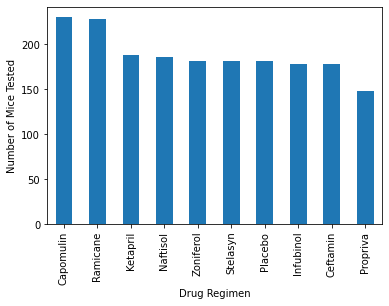

<Figure size 432x288 with 0 Axes>

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count = study_data_cleaned["Drug Regimen"].value_counts()
count.plot(kind = "bar")
plt.ylabel ("Number of Mice Tested")
plt.xlabel ("Drug Regimen")
plt.show()
plt.savefig("bar_plot1.png")

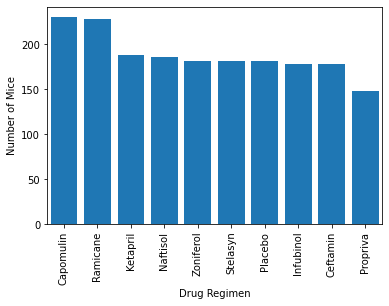

<Figure size 432x288 with 0 Axes>

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(count.index.values, count.values)
count.plot(kind = "bar")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()
plt.savefig("bar_plot.png")

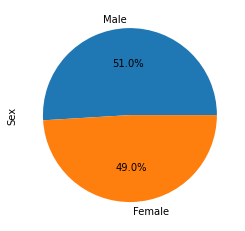

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = study_data_cleaned["Sex"].value_counts()
count.plot(kind="pie", autopct="%1.1f%%")
plt.show()

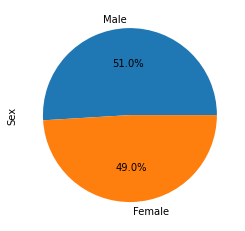

<Figure size 432x288 with 0 Axes>

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count.values, labels=count.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()
plt.savefig("pie_plot.png")

## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lastRegimen = study_data_cleaned.groupby(["Mouse ID"])["Timepoint"].max()
lastRegimen = lastRegimen.reset_index()
lastRegimen.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cleanMergedDF = lastRegimen.merge(study_data_cleaned, on=["Mouse ID", "Timepoint"], how="left")
cleanMergedDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [72]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    finalTumorVolume = cleanMergedDF.loc[cleanMergedDF["Drug Regimen"]== drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_list.append(finalTumorVolume)
    
    # Determine outliers using upper and lower bounds
    quartiles = finalTumorVolume.quantile([0.25, 0.5, 0.75])
    #quartiles = finalTumorVolume.quantile[(0.25, 0.5, 0.75)]
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerBound = lowerq - (1.5 * iqr)
    upperBound = upperq + (1.5 * iqr)
    outliers = finalTumorVolume.loc[(finalTumorVolume < lowerBound) | (finalTumorVolume > upperBound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


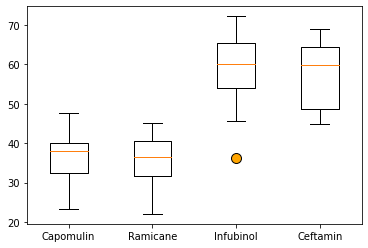

<Figure size 432x288 with 0 Axes>

In [94]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor="orange", markersize=10)
plt.boxplot(tumor_vol_list, labels=treatment_list, flierprops=orange_out)
plt.show()
plt.savefig("box_plot.png")

## Line and Scatter Plots

In [75]:
# Capomulin_Mice = cleanMergedDF.loc[cleanMergedDF["Drug Regimen"]== "Capomulin"]
# Capomulin_Mice = Capomulin_Mice.groupby('Mouse ID').mean()
# plt.show()

In [76]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_Mice = study_data_cleaned.loc[study_data_cleaned["Drug Regimen"]== "Capomulin"]
Mice = Capomulin_Mice.loc[Capomulin_Mice["Mouse ID"]== "b128"]
Mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
472,b128,5,45.651331,0,Capomulin,Female,9,22
679,b128,10,43.270852,0,Capomulin,Female,9,22
719,b128,15,43.784893,0,Capomulin,Female,9,22
933,b128,20,42.731552,0,Capomulin,Female,9,22
1268,b128,25,43.262145,1,Capomulin,Female,9,22
1400,b128,30,40.605335,1,Capomulin,Female,9,22
1547,b128,35,37.967644,1,Capomulin,Female,9,22
1629,b128,40,38.379726,2,Capomulin,Female,9,22
1764,b128,45,38.982878,2,Capomulin,Female,9,22


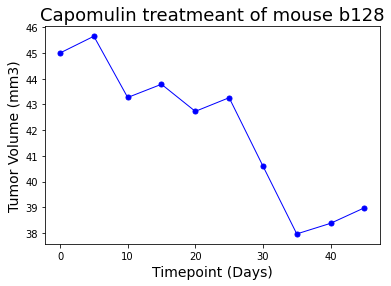

In [91]:
plt.title('Capomulin treatmeant of mouse b128',fontsize =18)
plt.plot(Mice['Timepoint'],Mice ['Tumor Volume (mm3)'], linewidth=1, markersize=5,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.savefig("line_graph.png")

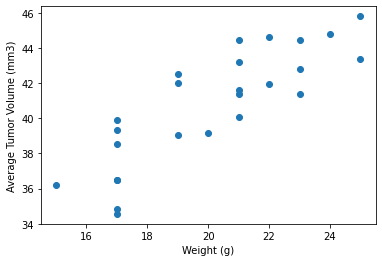

<Figure size 432x288 with 0 Axes>

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Mice = Capomulin_Mice.groupby('Mouse ID').mean()
plt.scatter(Capomulin_Mice['Weight (g)'], Capomulin_Mice['Tumor Volume (mm3)'])
plt.xlabel ('Weight (g)')
plt.ylabel ('Average Tumor Volume (mm3)')
plt.show()
plt.savefig("scatter_graph.png")

## Correlation and Regression

The Correlation between mouse weight and the average tumor volume is 0.84


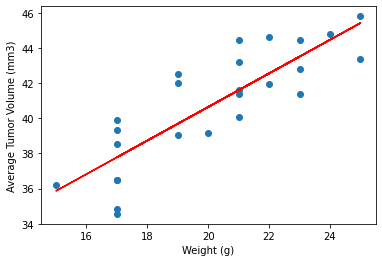

<Figure size 432x288 with 0 Axes>

In [93]:
Correlation_coefficient = round(st.pearsonr(Capomulin_Mice['Weight (g)'], Capomulin_Mice['Tumor Volume (mm3)'])[0],2)
print(f"The Correlation between mouse weight and the average tumor volume is {Correlation_coefficient}")
model = st.linregress(Capomulin_Mice['Weight (g)'], Capomulin_Mice['Tumor Volume (mm3)'])
y_value = Capomulin_Mice['Weight (g)'] * model[0] + model [1]
plt.scatter(Capomulin_Mice['Weight (g)'], Capomulin_Mice['Tumor Volume (mm3)'])
plt.plot(Capomulin_Mice['Weight (g)'], y_value, color="red")
plt.xlabel('Weight (g)')
plt.ylabel ('Average Tumor Volume (mm3)')

plt.show()
plt.savefig("correlation_graph.png")